## Homework 1 - Bollinger Bands

A **Bollinger Band®** is a technical analysis tool defined by a set of **trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)** of a security's price, but which can be adjusted to user preferences. Bollinger Bands® were developed and copyrighted by the famous technical trader John Bollinger, designed to  identify when an asset is oversold or overbought. Many traders believe the closer the prices move to the upper band, the more overbought the market is, and the closer the prices move to the lower band, the more oversold the market is <a href="https://www.investopedia.com/terms/b/bollingerbands.asp">[1]</a>.

**Task 1** consists in reading the whole APPL (Apple Inc.) dataset available in the _data_ directory, computing and plotting the Bollinger bands of the adjusted close price, moving average (20 days window size) and the adjusted close price itself. **Task 2** consists in identifying potential buying and selling opportunities and plotting vertical lines in the plot: green corresponding to buy signals, red to sell signals.

The output plot should look similar to this:
<img src="data/press_images/signals_by_boil.svg"/>

To implement Bollinger bands you may want to review the lecture of October 13: _rolling mean_, _rolling standard deviation_, _arrays operations and indexing_, _dataframe plotting_. The homework is due **by Friday October 23**. Should you need further clarifications or help, please feel free to contact us before the deadline.

Additional material:
- https://www.investopedia.com/terms/b/bollingerbands.asp
- https://www.bollingerbands.com/bollinger-band-rules
- https://www.iforex.in/bollinger-bands

In [94]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.width = 1200

In [95]:
df = pd.read_csv("data/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-09,56.757500,56.947498,56.410000,56.757500,56.199894,74770400
1,2019-10-10,56.982498,57.610001,56.825001,57.522499,56.957375,113013600
2,2019-10-11,58.237499,59.410000,58.077499,59.052502,58.472343,166795600
3,2019-10-14,58.724998,59.532501,58.667500,58.967499,58.388180,96427600
4,2019-10-15,59.097500,59.412498,58.720001,58.830002,58.252033,87360000


In [96]:
def set_date(dataframe:pd.DataFrame, date_column='Date')->pd.DataFrame:
    dataframe[date_column] = pd.to_datetime(dataframe[date_column])
    dataframe = dataframe.set_index(date_column)
    return dataframe

In [97]:
df = set_date(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-09,56.757500,56.947498,56.410000,56.757500,56.199894,74770400
2019-10-10,56.982498,57.610001,56.825001,57.522499,56.957375,113013600
2019-10-11,58.237499,59.410000,58.077499,59.052502,58.472343,166795600
2019-10-14,58.724998,59.532501,58.667500,58.967499,58.388180,96427600
2019-10-15,59.097500,59.412498,58.720001,58.830002,58.252033,87360000


## Task 1

In [103]:
def boolinger_bands(dataframe:pd.DataFrame, column='Adj Close', window_size=20):
    # MA stands for Moving Average
    column_moving_average = "MA_DAY_"+str(window_size)
    column_moving_std = "STD_DAY_"+str(window_size)
    
    dataframe[column_moving_average] = dataframe[column].rolling(window=window_size).mean()
    dataframe[column_moving_std] = dataframe[column].rolling(window=window_size).std()
    dataframe['U_BAND'] = dataframe[column_moving_average] + (dataframe[column_moving_std] * 2)
    dataframe['L_BAND'] = dataframe[column_moving_average] - (dataframe[column_moving_std] * 2)
    
    plotable_columns = [column,column_moving_average,'U_BAND','L_BAND']
    
    return dataframe, plotable_columns

In [117]:
def task_one(dataframe:pd.DataFrame, plot_size=(10,10)):
    print(plot_size)
    dataframe, columns = boolinger_bands(dataframe)
    ax = dataframe[columns].plot(figsize=plot_size)
    return ax

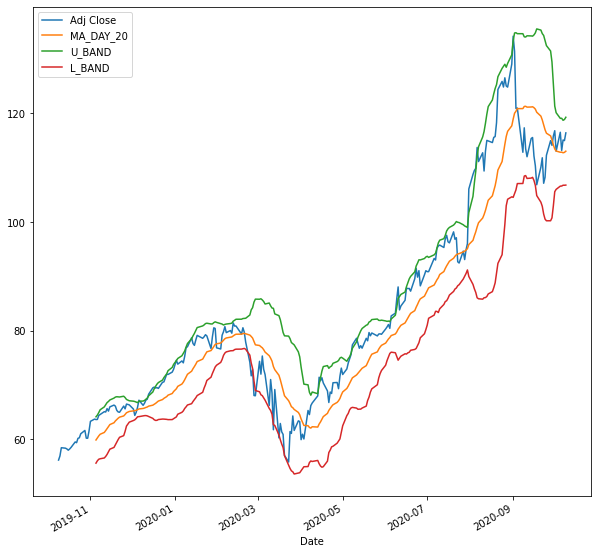

In [109]:
task_one(df)

## Task 2

In [118]:
def task_two(dataframe:pd.DataFrame, plot_size=(10,10), column='Adj Close'):
    print(plot_size)
    ax = task_one(dataframe, plot_size = plot_size)
    dataframe['BUY'] = (dataframe['L_BAND'] > dataframe[column])
    dataframe['SELL'] = (dataframe['U_BAND'] < dataframe[column])
    
    buy_dates = df[df['BUY'] == True].index.strftime('%Y-%m-%d').tolist()
    sell_dates = df[df['SELL'] == True].index.strftime('%Y-%m-%d').tolist()
    
    for buy_date in buy_dates:
        ax.axvline(buy_date, color="red", linestyle="--")
    for sell_date in sell_dates:
        ax.axvline(sell_date, color="green", linestyle="--")
    return ax

(20, 20)
(20, 20)


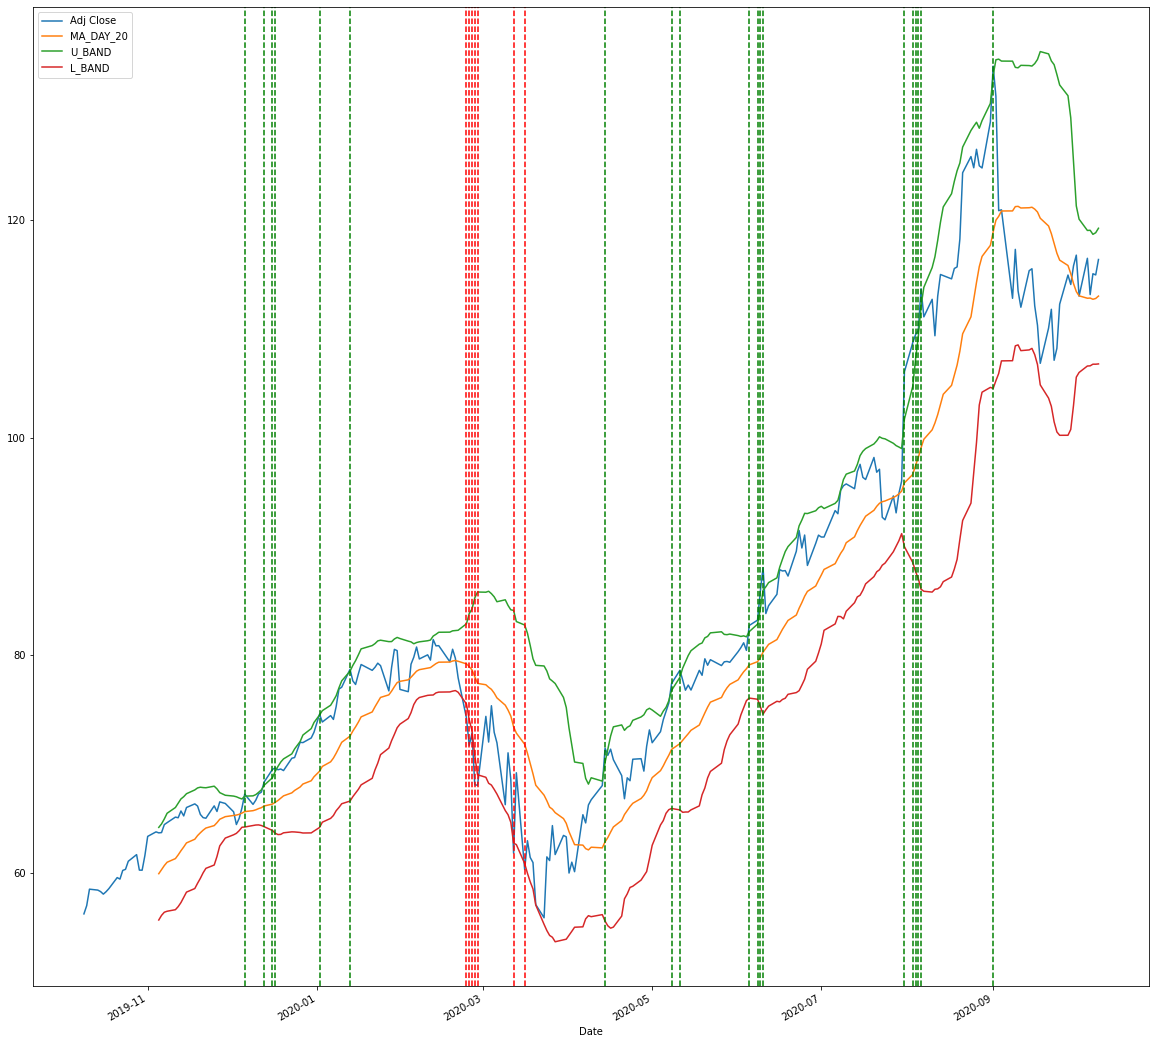

In [119]:
task_two(df, plot_size=(20,20))